# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | BA changed our prepaid seats a...
1,Not Verified | Flew from London Heathrow to M...
2,Not Verified | I was meant to fly in January t...
3,✅ Trip Verified | We have flown repeatedly wi...
4,✅ Trip Verified | I was horrified by the extr...


In [7]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [8]:
df["reviews"] = df["reviews"].str.replace("✅ Trip Verified", "")
df["reviews"] = df["reviews"].str.replace("Not Verified", "")
df["reviews"] = df["reviews"].str.replace("|", "")
df["reviews"] = df["reviews"].str.strip()
df["reviews"] = df["reviews"].str.lstrip()
df

<ipython-input-8-b02d8ad07fd3>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["reviews"] = df["reviews"].str.replace("|", "")


,reviews
0,BA changed our prepaid seats at the last minut...
1,Flew from London Heathrow to Marrakech. BA cha...
2,I was meant to fly in January to Algeria. I pa...
3,We have flown repeatedly with British Airways ...
4,I was horrified by the extremely small seats a...
...,...
995,London to Istanbul. Due to poor weather condit...
996,London to Cape Town. Flying first class with B...
997,London to Hamburg. Typically if I fly BA it is...
998,Turin to London Gatwick. Rubbish check-in serv...


### Sentiment Analysis

In [9]:
from textblob import TextBlob

# Load the data into a pandas DataFrame
#df = pd.read_csv("british_airways_reviews_cleaned.csv")

# Create a list to store the polarity values
polarity_values = []

# Loop through each review in the DataFrame and calculate its polarity
for review in df["reviews"]:
    blob = TextBlob(review)

    polarity = blob.sentiment.polarity

    polarity_values.append(polarity)
   

# Count the number of positive, negative and neutral reviews
positive = sum(1 for p in polarity_values if p > 0)
negative = sum(1 for p in polarity_values if p < 0)
neutral = sum(1 for p in polarity_values if p == 0)

# Print the results
print(f"Out of {len(df)} reviews, {positive} were positive, {negative} were negative and {neutral} were neutral.")


Out of 1000 reviews, 667 were positive, 324 were negative and 9 were neutral.


<Axes: ylabel='sentiment'>

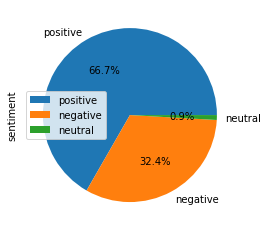

In [15]:
nb_df = pd.DataFrame(data={'sentiment' : [positive, negative, neutral]}, index=['positive', 'negative', 'neutral'])
nb_df.plot(kind='pie', y='sentiment', autopct='%1.1f%%')

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Create a list of reviews
reviews = df['reviews'].tolist()

# Create a CountVectorizer object
vectorizer = CountVectorizer(stop_words='english')


# Fit the vectorizer to the reviews
vectorizer.fit(reviews)
doc_term_matrix = vectorizer.fit_transform(reviews)
word_freq = dict(zip(vectorizer.get_feature_names_out(), doc_term_matrix.sum(axis=0).tolist()[0]))
# Create a dataframe to store the word frequencies
freq_df = pd.DataFrame(columns=["word", "frequency"])

# Loop through the vocabulary and count the frequencies of each word
for word, frequency in word_freq.items():
    freq_df = freq_df.append({"word": word, "frequency": frequency}, ignore_index=True)
# Sort the dataframe by frequency in descending order
freq_df = freq_df.sort_values(by="frequency", ascending=False)

Streaming output truncated to the last 5000 lines.
<ipython-input-16-64f5fe250190>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_df = freq_df.append({"word": word, "frequency": frequency}, ignore_index=True)
<ipython-input-16-64f5fe250190>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_df = freq_df.append({"word": word, "frequency": frequency}, ignore_index=True)
<ipython-input-16-64f5fe250190>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_df = freq_df.append({"word": word, "frequency": frequency}, ignore_index=True)
<ipython-input-16-64f5fe250190>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_df = fre

In [64]:
#freq_df = freq_df.reset_index().drop(columns='index')

<Axes: xlabel='word'>

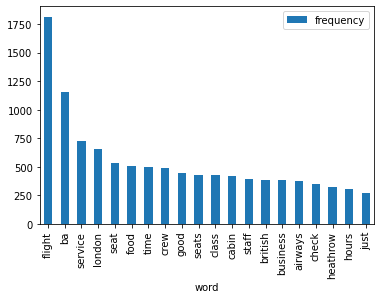

In [17]:
freq_df.head(20).plot(kind='bar', x='word', y='frequency')